In [323]:
import pandas as pd
import os
import numpy as np

In [324]:
convertTable = dict()
convertTable['Zip Code'] = str
df = pd.read_csv ('Telco_customer_churn.csv', dtype = convertTable)
df['Total Charges'] = pd.to_numeric(df['Total Charges'] , errors='coerce')
df[df['Total Charges'].isnull()==True]
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


## Missing Value Check

In [325]:
# Calculate the percentage of missing values 
missing_values = df.isnull().sum()
missing_values_percentage = 100 * missing_values / len(df)
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
missing_values_table = missing_values_table[missing_values_table.iloc[:,0] != 0].sort_values('% of Missing Values', ascending=False).round(1)
missing_values_table

,Missing Values,% of Missing Values
Churn Reason,5174,73.5
Total Charges,11,0.2


In [326]:
# drop missing value
df = df.drop(['Churn Reason'], axis=1)
df.dropna(how = 'any', inplace = True)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   object 
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

# EDA

In [328]:
df_eda = df.copy()

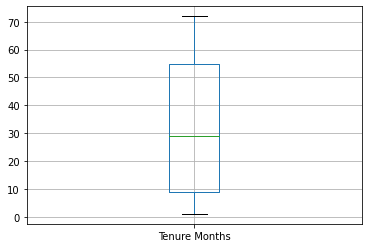

In [329]:
boxplot = df_eda.boxplot(column=['Tenure Months'])  

In [330]:
import plotly.express as px
fig = px.histogram(df_eda, x="Tenure Months")
fig.show()

In [331]:

print('Gender')
print(set(df_eda['Gender']))

print('Senior Citizen')
print(set(df_eda['Senior Citizen']))

print('Partner')
print(set(df_eda['Partner']))

print('Dependents')
print(set(df_eda['Dependents']))

print('Phone Service')
print(set(df_eda['Phone Service']))

print('Multiple Lines')
print(set(df_eda['Multiple Lines']))

print('Internet Service')
print(set(df_eda['Internet Service']))

print('Online Security')
print(set(df_eda['Online Security']))

print('Online Backup')
print(set(df_eda['Online Backup']))

print('Device Protection')
print(set(df_eda['Device Protection']))

print('Tech Support')
print(set(df_eda['Tech Support']))

print('Streaming TV')
print(set(df_eda['Streaming TV']))

print('Streaming Movies')
print(set(df_eda['Streaming Movies']))

print('Contract')
print(set(df_eda['Contract']))

print('Paperless Billing')
print(set(df_eda['Paperless Billing']))

print('Payment Method')
print(set(df_eda['Payment Method']))



Gender
{'Female', 'Male'}
Senior Citizen
{'No', 'Yes'}
Partner
{'No', 'Yes'}
Dependents
{'No', 'Yes'}
Phone Service
{'No', 'Yes'}
Multiple Lines
{'No', 'Yes', 'No phone service'}
Internet Service
{'No', 'Fiber optic', 'DSL'}
Online Security
{'No', 'No internet service', 'Yes'}
Online Backup
{'No', 'No internet service', 'Yes'}
Device Protection
{'No', 'No internet service', 'Yes'}
Tech Support
{'No', 'No internet service', 'Yes'}
Streaming TV
{'No', 'No internet service', 'Yes'}
Streaming Movies
{'No', 'No internet service', 'Yes'}
Contract
{'Two year', 'Month-to-month', 'One year'}
Paperless Billing
{'No', 'Yes'}
Payment Method
{'Credit card (automatic)', 'Bank transfer (automatic)', 'Mailed check', 'Electronic check'}


In [332]:
set(df_eda['Senior Citizen'])

{'No', 'Yes'}

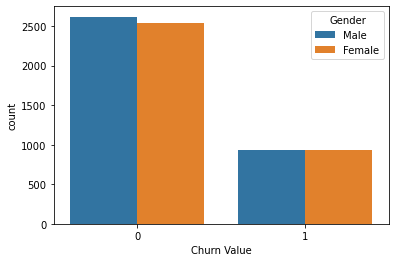

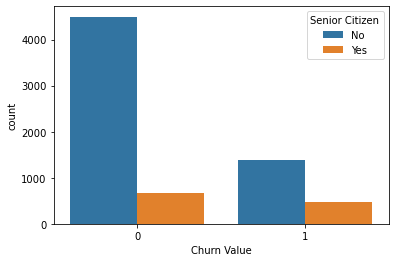

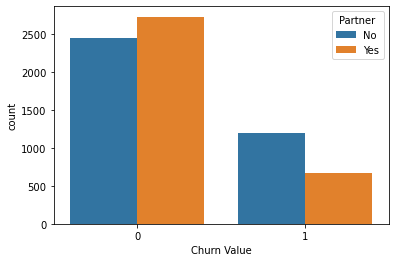

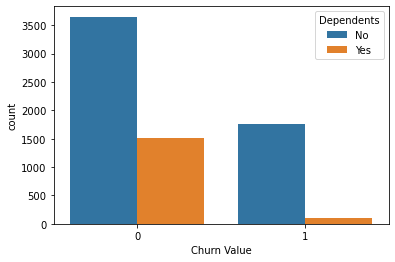

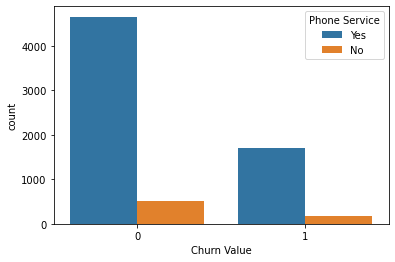

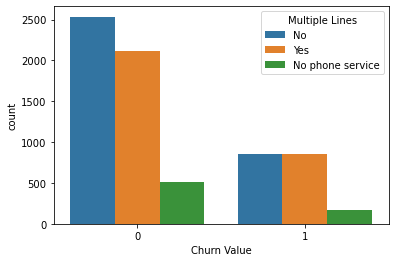

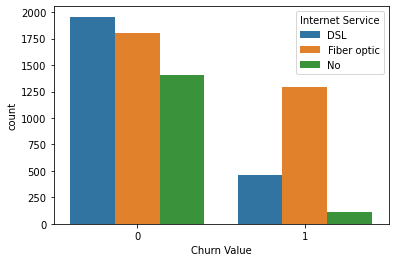

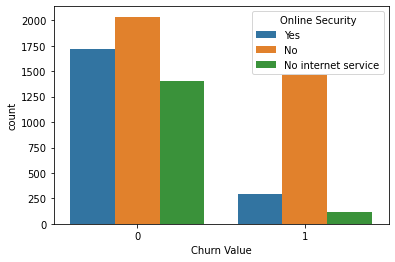

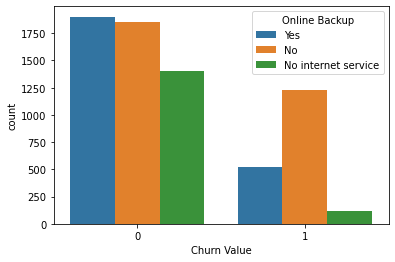

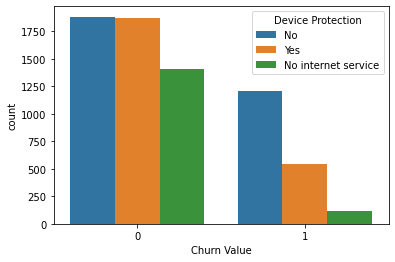

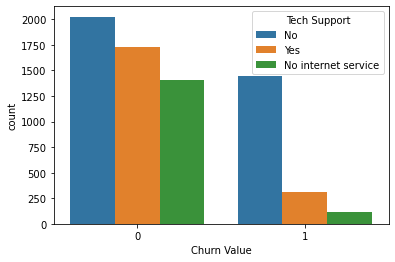

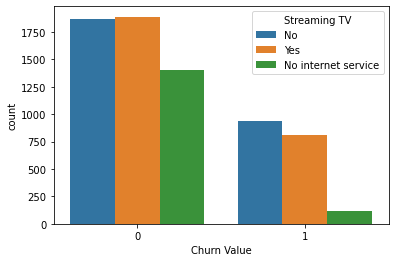

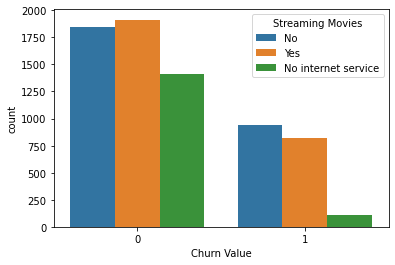

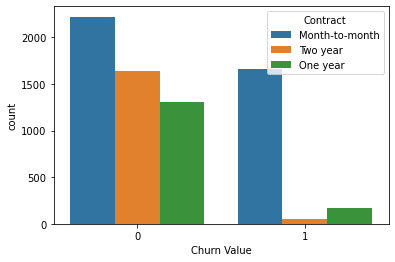

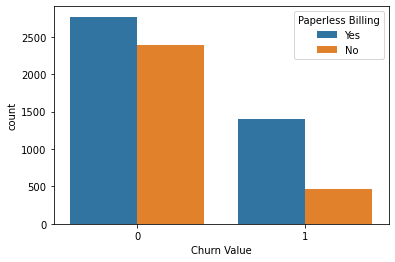

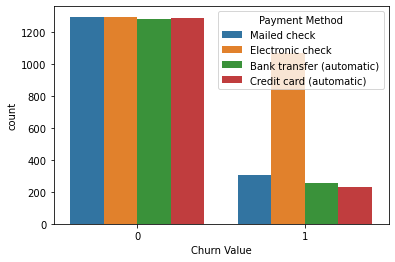

In [333]:
import matplotlib.pyplot as plt
import seaborn as sns
listcol = ['Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
for i in listcol:
    plt.figure(i)
    sns.countplot(x='Churn Value', hue =i,  data=df_eda)

In [334]:
import plotly.express as px

fig = px.scatter_mapbox(df_eda, lat="Latitude", 
                        lon="Longitude",
                        color="Churn Label",
                        color_discrete_map={"Yes": "rgb(254,57,57)", "No": "rgb(65,105,225)"},
                        hover_name="City", 
                        hover_data=["CustomerID"],
                        zoom=3, 
                        height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [335]:
df_eda.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


In [336]:
df_gen = df_eda.groupby(['Gender', 'Churn Label']).agg({'Churn Label': 'count'})
df_gen = df_gen.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_gen

Churn Label
Gender Churn Label             
Female No             73.040482
       Yes            26.959518
Male   No             73.795435
       Yes            26.204565

In [337]:
df_sn = df_eda.groupby(['Senior Citizen', 'Churn Label']).agg({'Churn Label': 'count'})
df_sn = df_sn.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_sn

Churn Label
Senior Citizen Churn Label             
No             No             76.349745
               Yes            23.650255
Yes            No             58.318739
               Yes            41.681261

In [338]:
# pd.crosstab(df['Churn Label'],df['Gender']).apply(lambda r: r/r.sum(), axis=1)

In [339]:
import plotly.graph_objects as go
import numpy as np

labels = ["Female","Male","Age < 65","Age >= 65"]
widths = np.array([25,25,25,25])

data = {
    "No": [73.079128,73.839662,76.393832,58.318739],
    "Yes": [26.920872,26.160338,23.606168,41.681261]
}

fig = go.Figure()
for key in data:
    fig.add_trace(go.Bar(
        name=key,
        y=data[key],
        x=np.cumsum(widths)-widths,
        width=widths,
        offset=0,
        customdata=np.transpose([labels, widths*data[key]]),
        texttemplate="%{y} x %{width} =<br>%{customdata[1]}",
        textposition="inside",
        textangle=0,
        textfont_color="white",
        hovertemplate="<br>".join([
            "label: %{customdata[0]}",
            "width: %{width}",
            "height: %{y}",
            "area: %{customdata[1]}",
        ])
    ))

fig.update_xaxes(
    tickvals=np.cumsum(widths)-widths/2,
    ticktext= ["%s<br>%d" % (l, w) for l, w in zip(labels, widths)]
)

fig.update_xaxes(range=[0,100])
fig.update_yaxes(range=[0,100])

fig.update_layout(
    title_text="Marimekko Chart",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10),
)

In [340]:
# df = df[['Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges','Churn Value','Churn Label','Churn Score','CLTV']]
# df

In [341]:
# df['Tenure Months']

In [342]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df_y = df_eda.copy()
df_y['tenure_year'] = pd.cut(df_y['Tenure Months'], range(1, 80, 12), right=False, labels=labels)
df_y['tenure_year'] = df_y['tenure_year'].replace({'1 - 12': 'firstyear','13 - 24': 'secondyear',
                             '25 - 36': 'thirdyear','37 - 48': 'fourthyear',
                             '49 - 60': 'fifthyear','61 - 72': 'sixthyear'})


df_y

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,tenure_year
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,firstyear
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,firstyear
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,firstyear
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,thirdyear
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,fifthyear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,sixthyear
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,secondyear
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,sixthyear
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,firstyear


In [343]:
# Split Violin Plot
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=df_y['tenure_year'][ df_y['Churn Label'] == 'Yes' ],
                        y=df_y['Monthly Charges'][ df_y['Churn Label'] == 'Yes' ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='positive',
                        line_color='red')
             )
fig.add_trace(go.Violin(x=df_y['tenure_year'][ df_y['Churn Label'] == 'No' ],
                        y=df_y['Monthly Charges'][ df_y['Churn Label'] == 'No' ],
                        legendgroup='No', scalegroup='No', name='No',
                        side='negative',
                        line_color='blue')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.35, violinmode='overlay')
fig.update_layout(autosize=False,width=1000,height=600,)
fig.update_layout(xaxis_title="period used", yaxis_title="Monthly Charges", width=1000)
fig.show()

In [344]:
# Split Violin Plot
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=df_y['Contract'][ df_y['Churn Label'] == 'Yes' ],
                        y=df_y['Monthly Charges'][ df_y['Churn Label'] == 'Yes' ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='positive',
                        line_color='red')
             )
fig.add_trace(go.Violin(x=df_y['Contract'][ df_y['Churn Label'] == 'No' ],
                        y=df_y['Monthly Charges'][ df_y['Churn Label'] == 'No' ],
                        legendgroup='No', scalegroup='No', name='No',
                        side='negative',
                        line_color='blue')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.35, violinmode='overlay')
fig.update_layout(autosize=False,width=1000,height=600,)
fig.update_layout(xaxis_title="Contract Types", yaxis_title="Monthly Charges", width=800)
fig.show()

In [345]:
df_ch = df_eda.groupby(['Senior Citizen', 'Churn Label']).agg({'Churn Label': 'count'})
df_ch.columns = ['customers']
df_ch = df_ch.reset_index()
df_ch

,Senior Citizen,Churn Label,customers
0,No,No,4497
1,No,Yes,1393
2,Yes,No,666
3,Yes,Yes,476


In [346]:
import plotly.express as px
fig = px.histogram(df_ch, x="Senior Citizen", y="customers",
             color='Churn Label', barmode='group',
             height=400)
fig.show()

In [347]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=100)
# X_resampled, y_resampled = sm.fit_resample(X,y)

# Logistic Regression
https://www.kaggle.com/code/nehapawar/churn-prediction-using-logistic-regression/notebook

In [450]:
import seaborn as sns
import matplotlib.pyplot as plt
    
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [430]:
df_logis = df.copy()

In [431]:
df_logis.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


In [432]:
df_logis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   object 
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

In [433]:
df_logis = df[['Churn Value','Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges']]
df_logis.head()


,Churn Value,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,1,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,1,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,1,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,1,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


0    5163
1    1869
Name: Churn Value, dtype: int64


C:\Users\kornc\Documents\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Churn Value', ylabel='count'>

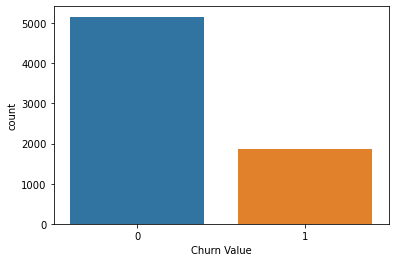

In [434]:
churn_count = pd.value_counts(df_logis['Churn Value'])
print(churn_count)
sns.countplot(df_logis['Churn Value'])

In [435]:
dummy_df_logis = pd.get_dummies(df_logis)
dummy_df_logis.head()

,Churn Value,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,1,2,70.70,151.65,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,1,8,99.65,820.50,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,1,28,104.80,3046.05,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,1,49,103.70,5036.30,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0


In [436]:
dummy_df_logis.columns

Index(['Churn Value', 'Tenure Months', 'Monthly Charges', 'Total Charges',
       'Gender_Female', 'Gender_Male', 'Senior Citizen_No',
       'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service', 'Streaming Movies_

In [437]:
y = dummy_df_logis['Churn Value']
X = dummy_df_logis.drop('Churn Value', axis=1)

In [438]:
# Feature Scaling use Min-Max Scaling [0,1]
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

In [439]:
# Train-Test-Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 100)

In [440]:
#Build model
from sklearn.linear_model import LogisticRegression
# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(fit_intercept = False, C = 1e6, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000.0, fit_intercept=False, solver='liblinear')

In [441]:
# predict future values
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [442]:
# # Evaluating Model Performance
# #for train set

# resiudals = np.abs(y_train, y_hat_train)
 
# #the number of times our model was correct ('0') and incorrect ('1')
# print(pd.Series(resiudals).value_counts())

# #normalized
# print(pd.Series(resiudals).value_counts(normalize = True))

In [443]:
# Evaluating Model Performance
#for test set

resiudals = np.abs(y_test, y_hat_test)
 
#the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(resiudals).value_counts())

#normalized
print(pd.Series(resiudals).value_counts(normalize = True))

0    1544
1     566
Name: Churn Value, dtype: int64
0    0.731754
1    0.268246
Name: Churn Value, dtype: float64


In [444]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[1544,    0],
       [   0,  566]], dtype=int64)

In [445]:
#  !pip install scipy  
# !pip uninstall sklearn
# !pip uninstall scikit-learn
# !pip install sklearn
# !pip install scikit-learn
# !pip install -U scikit-learn

In [446]:
# F1 Score

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(y_test, y_hat_test)
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)

print('precision_train')
print(precision_train)
print('precision_test')
print(precision_test)
print('--------------')
print('recall_train')
print(recall_train)
print('recall_test')
print(recall_test)
print('--------------')
print('accuracy_train')
print(accuracy_train)
print('accuracy_test')
print(accuracy_test)
print('--------------')
print('f1_train')
print(f1_train)
print('f1_test')
print(f1_test)

precision_train
0.6727589208006962
precision_test
1.0
--------------
recall_train
0.5932463545663853
recall_test
1.0
--------------
accuracy_train
0.8159284843559529
accuracy_test
1.0
--------------
f1_train
0.6305057096247961
f1_test
1.0


In [447]:
#the holdout validation approach.
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [451]:
print('accuracy score is: ', accuracy_score(y_test,y_pred))
print('roc auc score is: ', roc_auc_score(y_test,y_pred))
print('precision score is: ',precision_score(y_test,y_pred))
print('recall score is: ', recall_score(y_test,y_pred))


accuracy score is:  0.8052132701421801
roc auc score is:  0.730371985938959
precision score is:  0.6584867075664622
recall score is:  0.568904593639576


In [467]:
# แก้ปัญหา Imbalance classification ด้วยวิธีการ Oversampling
# !pip install imblearn
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=100)
X_resampled, y_resampled = sm.fit_resample(X,y)

mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 100)

# Instantiate a logistic regression model without an intercept, arbitrarily large C value will offset the lack of intercept
logreg = LogisticRegression(fit_intercept = False, C = 1e6, solver = 'liblinear')
# Fit the model to our X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000.0, fit_intercept=False, solver='liblinear')

In [468]:
# predict future values
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [469]:
# Evaluating Model Performance
#for test set

resiudals = np.abs(y_test, y_hat_test)
 
#the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(resiudals).value_counts())

#normalized
print(pd.Series(resiudals).value_counts(normalize = True))

0    1544
1     566
Name: Churn Value, dtype: int64
0    0.731754
1    0.268246
Name: Churn Value, dtype: float64


In [470]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[1544,    0],
       [   0,  566]], dtype=int64)

In [471]:
#the holdout validation approach.
y_pred=logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [472]:
print('accuracy score is: ', accuracy_score(y_test,y_pred))
print('roc auc score is: ', roc_auc_score(y_test,y_pred))
print('precision score is: ',precision_score(y_test,y_pred))
print('recall score is: ', recall_score(y_test,y_pred))


accuracy score is:  0.8056872037914692
roc auc score is:  0.7306958201358502
precision score is:  0.6598360655737705
recall score is:  0.568904593639576


In [367]:
# K-fold Cross- Validation

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


kfold = model_selection.KFold(n_splits=10)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

Accuracy: 80.00%


In [368]:
kfold = model_selection.KFold(n_splits=400)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0)) 

C:\Users\kornc\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\kornc\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\kornc\Documen

Accuracy: 79.82%


In [369]:
# K-fold Cross Validation
skfold = StratifiedKFold(n_splits=100)
model_skfold = LogisticRegression()
results_skfold = model_selection.cross_val_score(model_skfold, X_test, y_test, cv=skfold)
print("Accuracy: %.2f%%" % (results_skfold.mean()*100.0))

C:\Users\kornc\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\kornc\Documents\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\kornc\Documen

Accuracy: 79.75%


# Logistic Regression by cost fn
## ทำแบบ lecture ใน class

In [370]:
dummy_df_logis.head()

,Churn Value,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,Multiple Lines_Yes,Internet Service_DSL,Internet Service_Fiber optic,Internet Service_No,Online Security_No,Online Security_No internet service,Online Security_Yes,Online Backup_No,Online Backup_No internet service,Online Backup_Yes,Device Protection_No,Device Protection_No internet service,Device Protection_Yes,Tech Support_No,Tech Support_No internet service,Tech Support_Yes,Streaming TV_No,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
1,1,2,70.70,151.65,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,1,8,99.65,820.50,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3,1,28,104.80,3046.05,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0
4,1,49,103.70,5036.30,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0


In [371]:
dummy_df_logis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Churn Value                               7032 non-null   int64  
 1   Tenure Months                             7032 non-null   int64  
 2   Monthly Charges                           7032 non-null   float64
 3   Total Charges                             7032 non-null   float64
 4   Gender_Female                             7032 non-null   uint8  
 5   Gender_Male                               7032 non-null   uint8  
 6   Senior Citizen_No                         7032 non-null   uint8  
 7   Senior Citizen_Yes                        7032 non-null   uint8  
 8   Partner_No                                7032 non-null   uint8  
 9   Partner_Yes                               7032 non-null   uint8  
 10  Dependents_No                       

In [372]:
def sigmoid(z):
  # convert input to a numpy array
  z  =  np.array(z)

  g = np.zeros(z.shape)
  g = 1/(1+np.exp(-z))

  return g

In [373]:
def costFunction(theta, X, y, lambda_ = 0):
    # Initialize some useful values
    m = y.size  # number of training examples
    epsilon = 1e-5

    # You need to return the following variables correctly 
    J = 0
    
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta))
    tmp = theta.copy()
    tmp[0] = 0
    
    J = (1 / m) * np.sum(-y.dot(np.log(h+epsilon)) - (1 - y).dot(np.log(1 - h + epsilon))) + (lambda_ / m) * np.sum(np.square(tmp))
    #J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / m) * np.sum(np.square(tmp))
    
    grad = (1 / m) * (h - y).dot(X) + (lambda_ / m) * tmp
    
    return J, grad

In [374]:
def learningCurve(X, y, Xval, yval, theta, lambda_=0):
    # Number of training examples
    m = y.size

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
    
    options= {'maxiter': 400}
    
    for i in range(1, m + 1):
        res = optimize.minimize(costFunction,
                        theta,
                        (X[:i], y[:i],lambda_),
                        jac=True,
                        method='tnc',
                        options=options)
        
        theta_t = res.x 
        error_train[i - 1], _ = costFunction(theta_t, X[:i], y[:i])
        error_val[i - 1], _ = costFunction(theta_t, Xval, yval)
        
    return error_train, error_val

In [375]:
def validationCurve(X, y, Xval, yval, theta):
    # Selected values of lambda (you should not change this)
    lambda_vec = [0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]

    # You need to return these variables correctly.
    error_train = np.zeros(len(lambda_vec))
    error_val = np.zeros(len(lambda_vec))

    options= {'maxiter': 400}
    
    for i in range(len(lambda_vec)):
        lambda_try = lambda_vec[i]
        res = optimize.minimize(costFunction,
                        theta,
                        (X, y,lambda_try),
                        jac=True,
                        method='tnc',
                        options=options)
        
        theta_t = res.x 
        error_train[i], _ = costFunction(theta_t, X, y)
        error_val[i], _ = costFunction(theta_t, Xval, yval)
    
    return lambda_vec, error_train, error_val

In [376]:
def plotDecisionBoundary(theta, X, y, p=1):
   
    # make sure theta is a numpy array
    theta = np.array(theta)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
         
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Positive', 'Negative', 'Decision Boundary'])
        plt.xlim([-20, 20])
        plt.ylim([-20, 20])
    else:
        # Here is the grid range
                
        u = np.linspace(-20, 20, 100)
        v = np.linspace(-20, 20, 100)

        z = np.zeros((u.size, v.size))
        #print(z.shape)
    
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):

              poly_features = PolynomialFeatures(degree=p, include_bias=False)
              X_plot = poly_features.fit_transform(np.array([ui,vj]).reshape(1, -1))
              #print(X_plot)
              X_plot = (X_plot - mu)/std              
              #print(X_plot)
              X_plot = np.append(np.ones(1),X_plot)
              #print(X_plot)
              #print(theta)
              z[i, j] = np.dot(X_plot, theta)

        #print(z)
        z = z.T  # important to transpose z before calling contour
       
        plt.contour(u, v, z, 0, linewidths=2, colors='g')
        #plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        #plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

In [377]:
# #random splitting the data into training set (4220)[60%], validation set (1406)[20%], test set (1406)[20%]

# from sklearn.model_selection import train_test_split
# X, Xtest, y, ytest = train_test_split(data[:,1:], data[:,0], test_size=1406, shuffle=True, random_state=100)
# # X, Xval, y, yval = train_test_split(X, y, test_size=1406, shuffle=True, random_state=100)

# Neural Network

https://www.analyticsvidhya.com/blog/2021/10/customer-churn-prediction-using-artificial-neural-network/

In [378]:
# สร้าง df สำหรับ Neural Network
df_nn = df[['Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges','Churn Value']]
df_nn.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [379]:
pd.set_option('display.max_columns', None)
df_nn.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [380]:
# Group the tenure in bins of 12 months
# labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

# df_nn['tenure_year'] = pd.cut(df_nn['Tenure Months'], range(1, 80, 12), right=False, labels=labels)
# df_nn['tenure_year'].value_counts()

In [381]:
# df_nn = df_nn.drop(columns=['CLTV','Churn Score'])
# df_nn

In [382]:
df_nn.head()


,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [383]:
#numerical variables

num = list(df_nn.select_dtypes(include=['int64','float64']).keys())

#categorical variables

cat = list(df_nn.select_dtypes(include='O').keys())

print(cat)

print(num)

['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
['Tenure Months', 'Monthly Charges', 'Total Charges', 'Churn Value']


In [384]:

print('Gender')
print(set(df_nn['Gender']))

print('Senior Citizen')
print(set(df_nn['Senior Citizen']))

print('Partner')
print(set(df_nn['Partner']))

print('Dependents')
print(set(df_nn['Dependents']))

print('Phone Service')
print(set(df_nn['Phone Service']))

print('Multiple Lines')
print(set(df_nn['Multiple Lines']))

print('Internet Service')
print(set(df_nn['Internet Service']))

print('Online Security')
print(set(df_nn['Online Security']))

print('Online Backup')
print(set(df_nn['Online Backup']))

print('Device Protection')
print(set(df_nn['Device Protection']))

print('Tech Support')
print(set(df_nn['Tech Support']))

print('Streaming TV')
print(set(df_nn['Streaming TV']))

print('Streaming Movies')
print(set(df_nn['Streaming Movies']))

print('Contract')
print(set(df_nn['Contract']))

print('Paperless Billing')
print(set(df_nn['Paperless Billing']))

print('Payment Method')
print(set(df_nn['Payment Method']))



Gender
{'Female', 'Male'}
Senior Citizen
{'No', 'Yes'}
Partner
{'No', 'Yes'}
Dependents
{'No', 'Yes'}
Phone Service
{'No', 'Yes'}
Multiple Lines
{'No', 'Yes', 'No phone service'}
Internet Service
{'No', 'Fiber optic', 'DSL'}
Online Security
{'No', 'No internet service', 'Yes'}
Online Backup
{'No', 'No internet service', 'Yes'}
Device Protection
{'No', 'No internet service', 'Yes'}
Tech Support
{'No', 'No internet service', 'Yes'}
Streaming TV
{'No', 'No internet service', 'Yes'}
Streaming Movies
{'No', 'No internet service', 'Yes'}
Contract
{'Two year', 'Month-to-month', 'One year'}
Paperless Billing
{'No', 'Yes'}
Payment Method
{'Credit card (automatic)', 'Bank transfer (automatic)', 'Mailed check', 'Electronic check'}


In [385]:
# value_counts of the categorical columns
# for i in cat:
#     print(df[i].value_counts())
# as we see that there is extra categories which we have to convert it into No.
df_nn['Multiple Lines'] = df_nn['Multiple Lines'].replace('No phone service','No')
df_nn['Online Security'] = df_nn['Online Security'].replace('No internet service','No')
df_nn['Online Backup'] = df_nn['Online Backup'] .replace('No internet service','No')
df_nn['Device Protection'] = df_nn['Device Protection'].replace('No internet service','No')
df_nn['Tech Support'] = df_nn['Tech Support'].replace('No internet service','No')
df_nn['Streaming TV'] = df_nn['Streaming TV'].replace('No internet service','No')
df_nn['Streaming Movies'] = df_nn['Streaming Movies'].replace('No internet service','No')
df_nn

<ipython-input-385-9e853f0f2cee>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-385-9e853f0f2cee>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-385-9e853f0f2cee>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-385-9e8

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7041,Female,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [386]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_nn['Internet Service'] = label.fit_transform(df_nn['Internet Service'])
df_nn['Contract'] = label.fit_transform(df_nn['Contract'])
df_nn['Payment Method'] = label.fit_transform(df_nn['Payment Method'])

<ipython-input-386-38463c62db6e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-386-38463c62db6e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-386-38463c62db6e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [387]:
df_nn

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,0,Yes,Yes,No,No,No,No,0,Yes,3,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,1,No,No,No,No,No,No,0,Yes,2,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,1,No,No,Yes,No,Yes,Yes,0,Yes,2,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,1,No,No,Yes,Yes,Yes,Yes,0,Yes,2,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,0,Yes,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,2,No,No,No,No,No,No,2,Yes,0,21.15,1419.40,0
7039,Male,No,Yes,Yes,24,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,1,Yes,3,84.80,1990.50,0
7040,Female,No,Yes,Yes,72,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,1,Yes,1,103.20,7362.90,0
7041,Female,No,Yes,Yes,11,No,No,0,Yes,No,No,No,No,No,0,Yes,2,29.60,346.45,0


In [388]:
# we will convert male = 1 and female = 0
df_nn.Gender = df_nn.Gender.replace('Male',1)
df_nn.Gender = df_nn.Gender.replace('Female',0)

<ipython-input-388-5014f3bfab17>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-388-5014f3bfab17>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [389]:
df_nn

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,No,No,No,2,Yes,No,0,Yes,Yes,No,No,No,No,0,Yes,3,53.85,108.15,1
1,0,No,No,Yes,2,Yes,No,1,No,No,No,No,No,No,0,Yes,2,70.70,151.65,1
2,0,No,No,Yes,8,Yes,Yes,1,No,No,Yes,No,Yes,Yes,0,Yes,2,99.65,820.50,1
3,0,No,Yes,Yes,28,Yes,Yes,1,No,No,Yes,Yes,Yes,Yes,0,Yes,2,104.80,3046.05,1
4,1,No,No,Yes,49,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,0,Yes,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,No,No,No,72,Yes,No,2,No,No,No,No,No,No,2,Yes,0,21.15,1419.40,0
7039,1,No,Yes,Yes,24,Yes,Yes,0,Yes,No,Yes,Yes,Yes,Yes,1,Yes,3,84.80,1990.50,0
7040,0,No,Yes,Yes,72,Yes,Yes,1,No,Yes,Yes,No,Yes,Yes,1,Yes,1,103.20,7362.90,0
7041,0,No,Yes,Yes,11,No,No,0,Yes,No,No,No,No,No,0,Yes,2,29.60,346.45,0


In [390]:
for i in cat:
    df_nn[i] = df_nn[i].replace('Yes',1)
    df_nn[i] = df_nn[i].replace('No',0)
    

<ipython-input-390-0f054938b477>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-390-0f054938b477>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [391]:
df_nn

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
1,0,0,0,1,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
2,0,0,0,1,8,1,1,1,0,0,1,0,1,1,0,1,2,99.65,820.50,1
3,0,0,1,1,28,1,1,1,0,0,1,1,1,1,0,1,2,104.80,3046.05,1
4,1,0,0,1,49,1,1,1,0,1,1,0,1,1,0,1,0,103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,2,0,0,0,0,0,0,2,1,0,21.15,1419.40,0
7039,1,0,1,1,24,1,1,0,1,0,1,1,1,1,1,1,3,84.80,1990.50,0
7040,0,0,1,1,72,1,1,1,0,1,1,0,1,1,1,1,1,103.20,7362.90,0
7041,0,0,1,1,11,0,0,0,1,0,0,0,0,0,0,1,2,29.60,346.45,0


In [392]:
scale_cols = ['Tenure Months','Monthly Charges','Total Charges']
# now we scling all the data 
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df_nn[scale_cols] = scale.fit_transform(df_nn[scale_cols])

<ipython-input-392-041790f8dcd5>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [393]:
# independent and dependent variables
x = df_nn.drop('Churn Value',axis=1)
y = df_nn['Churn Value']

In [394]:
# Splitting data
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)
print(xtrain.shape)
print(xtest.shape)

(4922, 19)
(2110, 19)


In [395]:
# Build Neural Network
import tensorflow as tf
from tensorflow import keras

In [396]:
model = keras.Sequential([
    # input layer
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(10,activation = 'relu'),
    # we use sigmoid for binary output
    # output layer
    keras.layers.Dense(1, activation='sigmoid')
]
)

In [397]:
# time for compilation of neural net.
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
# now we fit our model to training data
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
154/154 [==============================] - 0s 615us/step - loss: 0.5759 - accuracy: 0.7078
Epoch 2/100
154/154 [==============================] - 0s 595us/step - loss: 0.4773 - accuracy: 0.7426
Epoch 3/100
154/154 [==============================] - 0s 569us/step - loss: 0.4273 - accuracy: 0.7936
Epoch 4/100
154/154 [==============================] - 0s 575us/step - loss: 0.4100 - accuracy: 0.8037
Epoch 5/100
154/154 [==============================] - 0s 560us/step - loss: 0.4063 - accuracy: 0.8041
Epoch 6/100
154/154 [==============================] - 0s 569us/step - loss: 0.4015 - accuracy: 0.8088
Epoch 7/100
154/154 [==============================] - 0s 556us/step - loss: 0.4002 - accuracy: 0.8100
Epoch 8/100
154/154 [==============================] - 0s 549us/step - loss: 0.3967 - accuracy: 0.8139
Epoch 9/100
154/154 [==============================] - 0s 549us/step - loss: 0.3942 - accuracy: 0.8161
Epoch 10/100
154/154 [==============================] - 0s 569us/step - l

In [398]:
# evalute the model
model.evaluate(xtest,ytest)

66/66 [==============================] - 0s 415us/step - loss: 0.4862 - accuracy: 0.7711


[0.48624661564826965, 0.771090030670166]

In [399]:
# predict the churn values
ypred = model.predict(xtest)
print(ypred)
# unscaling the ypred values 
ypred_lis = []
for i in ypred:
    if i>0.5:
        ypred_lis.append(1)
    else:
        ypred_lis.append(0)
print(ypred_lis)

[[4.5828041e-01]
 [2.4502546e-05]
 [8.4463918e-01]
 ...
 [6.4560771e-02]
 [2.6711690e-01]
 [7.7642298e-01]]
[0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [400]:
#make dataframe for comparing the orignal and predict values
data = {'orignal_churn':ytest, 'predicted_churn':ypred_lis}
df_check = pd.DataFrame(data)
df_check.head(10)

,orignal_churn,predicted_churn
939,1,0
3729,0,0
1756,1,1
2279,0,0
1867,1,0
1965,0,0
2529,0,1
1611,1,1
2482,0,0
5914,0,0


In [401]:
# checking for performance metrices
#importing classification_report and confusion metrics
from sklearn.metrics import confusion_matrix, classification_report
#print classification_report
print(classification_report(ytest,ypred_lis))
# ploting the confusion metrix plot
conf_mat = tf.math.confusion_matrix(labels=ytest,predictions=ypred_lis)
# plt.figure(figsize = (17,7))
# sb.heatmap(conf_mat, annot=True,fmt='d')
# plt.xlabel('Predicted_number')
# plt.ylabel('True_number')

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1544
           1       0.58      0.52      0.55       566

    accuracy                           0.77      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.76      0.77      0.77      2110



# SVM

In [402]:
# สร้าง df สำหรับ Support Vector Machine
df_svm = df[['Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges','Churn Value']]
df_svm.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [403]:
df_svm.Gender = df_svm.Gender.replace('Male',1)
df_svm.Gender = df_svm.Gender.replace('Female',0)
df_svm['Multiple Lines'] = df_svm['Multiple Lines'].replace('No phone service','No')
df_svm['Online Security'] = df_svm['Online Security'].replace('No internet service','No')
df_svm['Online Backup'] = df_svm['Online Backup'] .replace('No internet service','No')
df_svm['Device Protection'] = df_svm['Device Protection'].replace('No internet service','No')
df_svm['Tech Support'] = df_svm['Tech Support'].replace('No internet service','No')
df_svm['Streaming TV'] = df_svm['Streaming TV'].replace('No internet service','No')
df_svm['Streaming Movies'] = df_svm['Streaming Movies'].replace('No internet service','No')
df_svm

<ipython-input-403-18bbb1175c64>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-403-18bbb1175c64>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-403-18bbb1175c64>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-403-18b

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,0,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,0,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,0,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,1,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,No,No,No,72,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0
7039,1,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
7040,0,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
7041,0,No,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


In [404]:
# from sklearn.preprocessing import LabelEncoder
# label = LabelEncoder()
# df_svm['Internet Service'] = label.fit_transform(df_nn['Internet Service'])
# df_svm['Contract'] = label.fit_transform(df_nn['Contract'])
# df_svm['Payment Method'] = label.fit_transform(df_nn['Payment Method'])
# df_svm

In [405]:
for i in cat:
    df_svm[i] = df_svm[i].replace('Yes',1)
    df_svm[i] = df_svm[i].replace('No',0)
df_svm

<ipython-input-405-0c7b1247cfc5>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-405-0c7b1247cfc5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
1,0,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
2,0,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
3,0,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
4,1,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,0,0,0,0,0,0,0,Two year,1,Bank transfer (automatic),21.15,1419.40,0
7039,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7040,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7041,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0


In [406]:
df_svm = pd.get_dummies(df_svm, columns=['Internet Service','Contract','Payment Method'])
df_svm.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_0,Internet Service_DSL,Internet Service_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,0,0,1,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,0,1,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,0,1,1,0,1,1,1,103.70,5036.30,1,0,0,1,1,0,0,1,0,0,0


In [407]:
df_svm

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_0,Internet Service_DSL,Internet Service_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,0,1,0,1,0,0,0,0,0,1
1,0,0,0,1,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,0,1,1,0,0,0,0,1,0
2,0,0,0,1,8,1,1,0,0,1,0,1,1,1,99.65,820.50,1,0,0,1,1,0,0,0,0,1,0
3,0,0,1,1,28,1,1,0,0,1,1,1,1,1,104.80,3046.05,1,0,0,1,1,0,0,0,0,1,0
4,1,0,0,1,49,1,1,0,1,1,0,1,1,1,103.70,5036.30,1,0,0,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,0,72,1,0,0,0,0,0,0,0,1,21.15,1419.40,0,1,0,0,0,0,1,1,0,0,0
7039,1,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.50,0,0,1,0,0,1,0,0,0,0,1
7040,0,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.90,0,0,0,1,0,1,0,0,1,0,0
7041,0,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0,1,0,1,0,0,0,0,1,0


In [408]:
# scale_cols = ['Tenure Months','Monthly Charges','Total Charges']
# # now we scling all the data 
# from sklearn.preprocessing import MinMaxScaler
# scale = MinMaxScaler()
# df_svm[scale_cols] = scale.fit_transform(df_svm[scale_cols])
# df_svm

In [409]:
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [410]:
#split train test
X_train, X_test, y_train, y_test = train_test_split(df_svm, y, random_state=100)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [411]:
# Build A Preliminary Support Vector Machine
clf_svm = SVC(random_state=100)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=100)

C:\Users\kornc\Documents\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



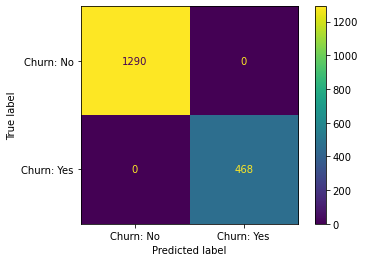

In [412]:
# Confusion Matrix
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      display_labels=["Churn: No", "Churn: Yes"])

In [413]:
# Optimize Parameters with Cross Validation and GridSearchCv()
num_features = np.size(X_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
## NOTE: We are includeing C=1 and gamma=1/(num_features * X_train_scaled.var())
## as possible choices since they are the default values.
## ALSO NOTE: Because X_train_scaled.var() = 1 [remember, X_train_scaled = scale(X_train)],
## 1/(num_features * X_train_scaled.var()) = 1/num_features

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 0.037037037037037035, 'kernel': 'rbf'}


C:\Users\kornc\Documents\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



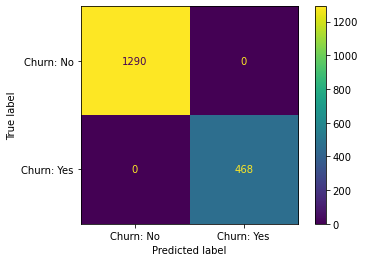

In [414]:
# Building, Evaluating, Drawing, and Interpreting the Final Support Vector Machine
clf_svm = SVC(random_state=100, C=10, gamma=0.0001)
clf_svm.fit(X_train_scaled, y_train)

plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      display_labels=["Churn: No", "Churn: Yes"])

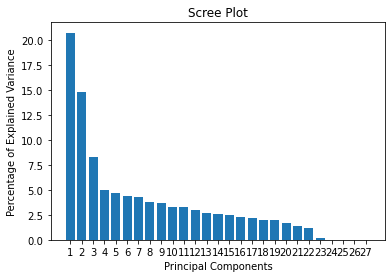

In [415]:
pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [416]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now center and scale the PCs...
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Now we optimize the SVM fit to the x and y-axis coordinates
## of the data after PCA dimension reduction...
num_features = np.size(pca_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


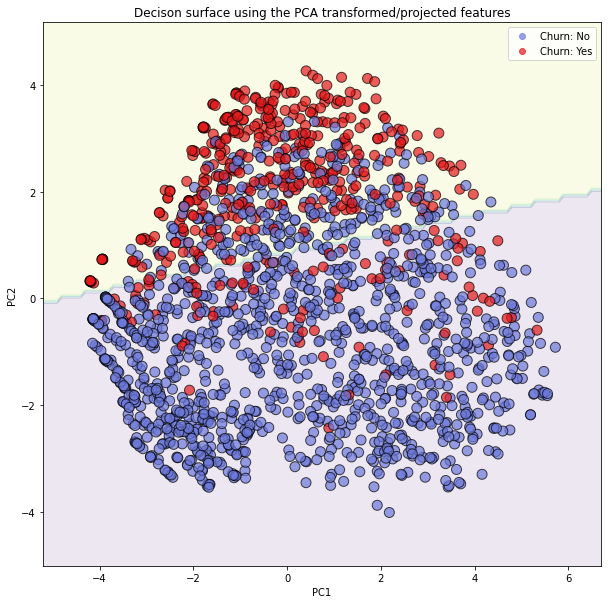

In [417]:
clf_svm = SVC(random_state=100, C=100, gamma=0.0001)
clf_svm.fit(pca_train_scaled, y_train)

## Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#6e7adb','#e41a1c'])
## now draw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("Churn: No")
legend.get_texts()[1].set_text("Churn: Yes")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
## plt.savefig('svm.png')
plt.show()